## Table of contents:

1. [Introduction](#zeroth-bullet)

2. [Preliminary Data Analyses](#first-bullet)

3. [Data Wrangling](#second-bullet)

4. [Exploratory Data Analyses (EDA)](#third-bullet)

5. [Answers to Questions](#fourth-bullet)

## Introduction <a class="anchor" id="zeroth-bullet"></a>

This is the data story telling project for capstone project 1: Indian liver patients.
We will use EDA techniques to study the data and provide answers to questions.  

In [2]:
# Load Indian liver patient data 
data=pd.read_csv('data/indian_liver_patient.csv')

## Preliminary Data Analyses <a class="anchor" id="first-bullet"></a>

#### In this section, we will explore given data to find missing values and learn how many features/samples are in the data set.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Data info shows that there are missing values for the Albumin_and_Globulin_Ratio feature. Also, we observe one categorical variable "Gender".

In [4]:
data.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1,0.4


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


### From data head and statistics (using describe method), we conlcude that data is not normalized because there is a big spread in values for different features.   

In [6]:
# Create new DataFrame that includes Male, Female patient information

disease, no_disease = data['Dataset'].value_counts()
male, female = data['Gender'].value_counts()

info=['Diognised with Liver Disease', 'Not Diognised with Liver Disease', 'Male', 'Female']
count=[disease, no_disease, male, female]

df_patient=pd.DataFrame({'Patient Info': info, 'Count': count})

In [7]:
df_patient

,Count,Patient Info
0,416,Diognised with Liver Disease
1,167,Not Diognised with Liver Disease
2,441,Male
3,142,Female


### Newly created data frame for patients shows that data is imbalanced becuase there are more records for patients with liver disease compared to healthy patients. 

## Data Wrangling <a class="anchor" id="second-bullet"></a>

#### In this section, we fill out missing values with median value for the given feature. Then, we will process categorical variable 'Gender' and will create two new features 'Male' and 'Female' from it.

In [8]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [9]:
target=data['Dataset']
sex=pd.get_dummies(data['Gender'])
#data = data.join(sex)
data.insert(loc=0, column='Male', value=sex['Male'])
data.insert(loc=0, column='Female', value=sex['Female'])
data.drop(['Gender'], axis=1, inplace=True)
#data.drop(['Dataset'], axis=1, inplace=True)

In [10]:
cols = data.columns
cols = list(set(cols))
del cols[cols.index('Dataset')]
#data.hist(column=cols, bins=10, figsize=(20,20), xlabelsize = 7, color='green', log=True)
del cols[cols.index('Male')]
del cols[cols.index('Female')]

## Exploratory Data Analyses (EDA) <a class="anchor" id="third-bullet"></a>

#### In this section, we learn more abot data by vizualizing it on plots, which will help us in identifying outliers and other important details about the data.

In [11]:
def plot_data(cols, data, plot_type):

    fig = plt.figure(figsize = (25,25))
    
    sns.set(font_scale=1.5) 
    
    for idx, val in enumerate(cols):
            
        plt.subplot(3, 3, idx+1)

        if plot_type == 'hist':
            disease = 'sns.distplot(data[data["Dataset"] == 1].' + val + ', color="blue", label="Liver disease")'
            healthy = 'sns.distplot(data[data["Dataset"] == 2].' + val + ', color="orange", label="Healthy liver")'
            exec (disease)
            exec (healthy)
            plt.legend()
            plt.xlabel(val)
            plt.ylabel("Frequency")
            
        if plot_type == 'swarm':
            condition = 'sns.swarmplot(x=' +  "'" + 'Dataset' + "'" + ',y=' + "'" + val + "'" + ',data=data)'
            print (condition)
            exec (condition)
              
        if plot_type == 'box':
            condition = 'sns.boxplot(x=' +  "'" + 'Dataset' + "'" + ',y=' + "'" + val + "'" + ',data=data)'
            print (condition)
            exec (condition)
        
    return 0

0

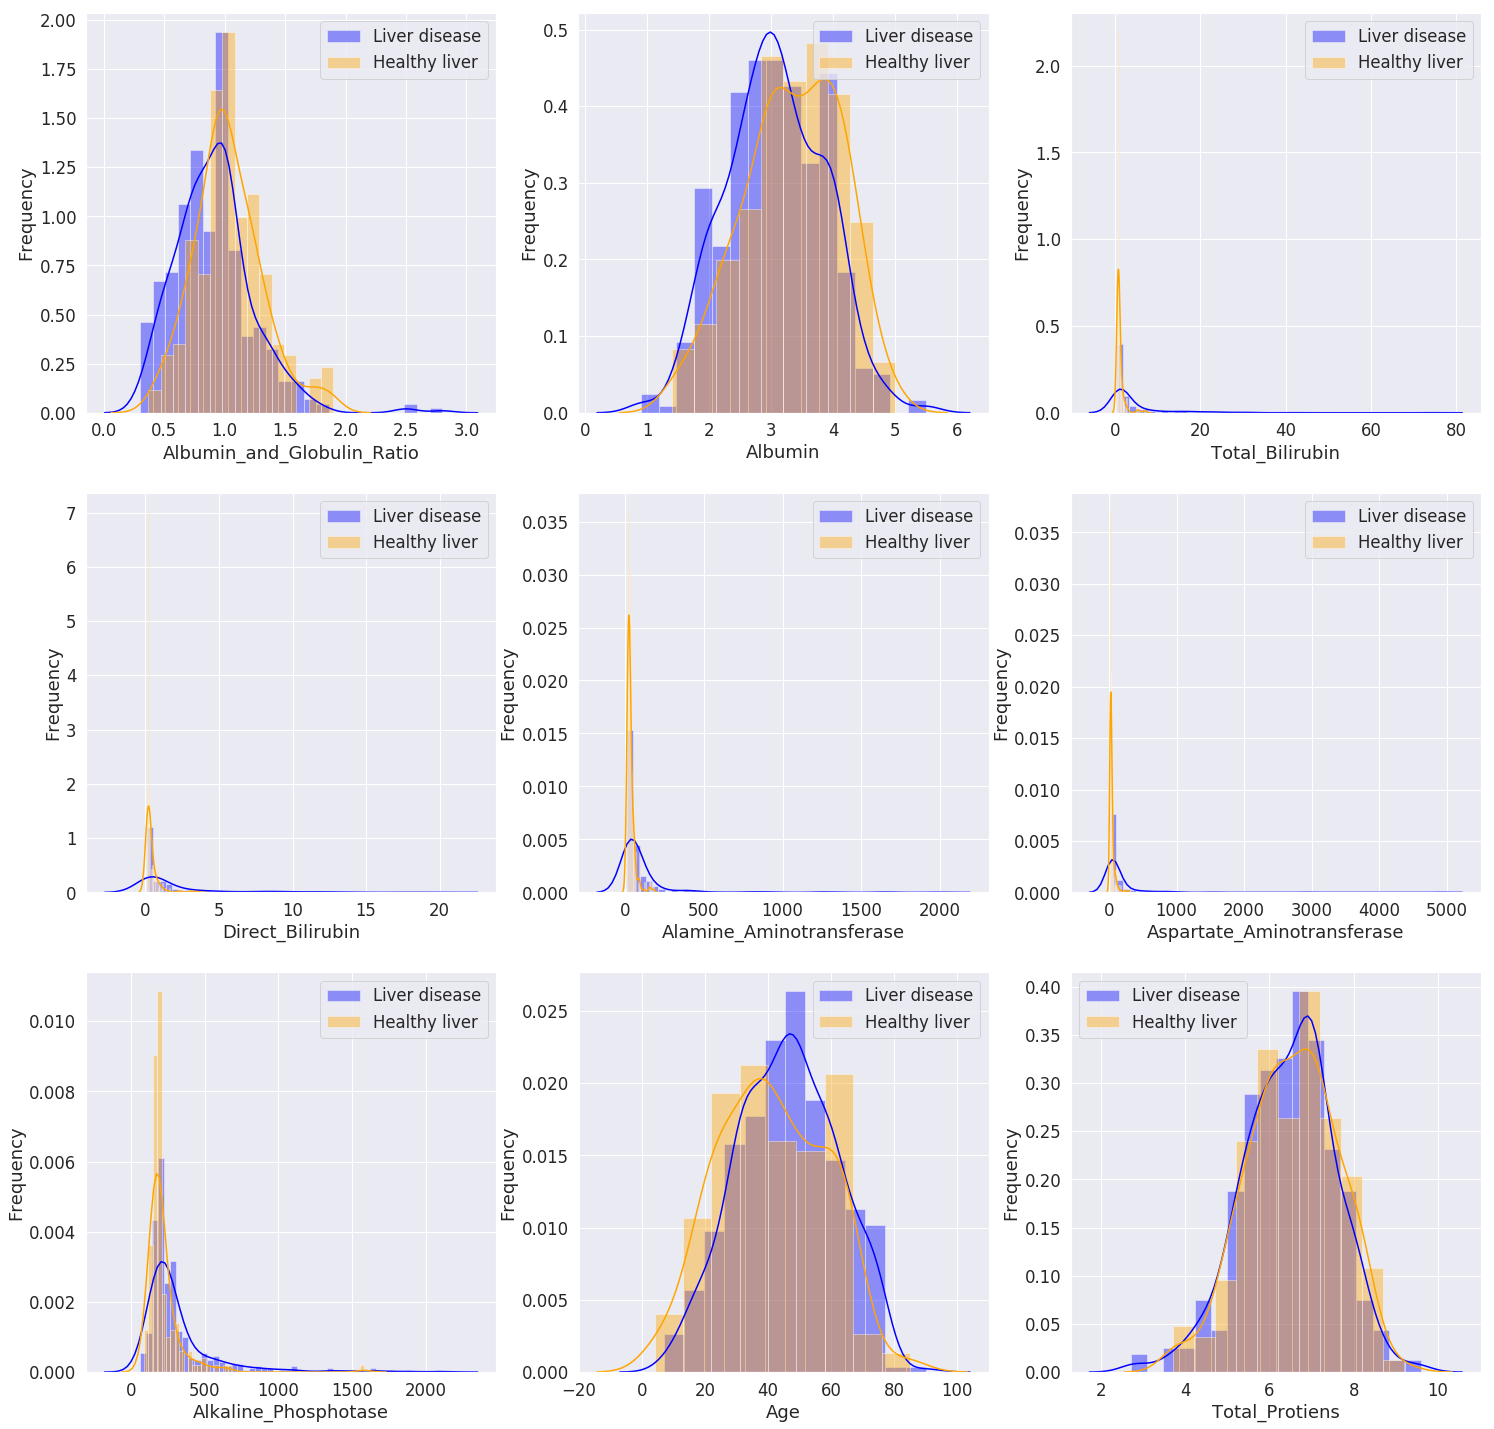

In [12]:
plot_data(cols, data, 'hist')

### From the histogram plots we observe that the healthy patients have higher frequency of small values in narrow ranges comapred to unhealthy patients. 

sns.swarmplot(x='Dataset',y='Albumin_and_Globulin_Ratio',data=data)
sns.swarmplot(x='Dataset',y='Albumin',data=data)
sns.swarmplot(x='Dataset',y='Total_Bilirubin',data=data)
sns.swarmplot(x='Dataset',y='Direct_Bilirubin',data=data)
sns.swarmplot(x='Dataset',y='Alamine_Aminotransferase',data=data)
sns.swarmplot(x='Dataset',y='Aspartate_Aminotransferase',data=data)
sns.swarmplot(x='Dataset',y='Alkaline_Phosphotase',data=data)
sns.swarmplot(x='Dataset',y='Age',data=data)
sns.swarmplot(x='Dataset',y='Total_Protiens',data=data)


0

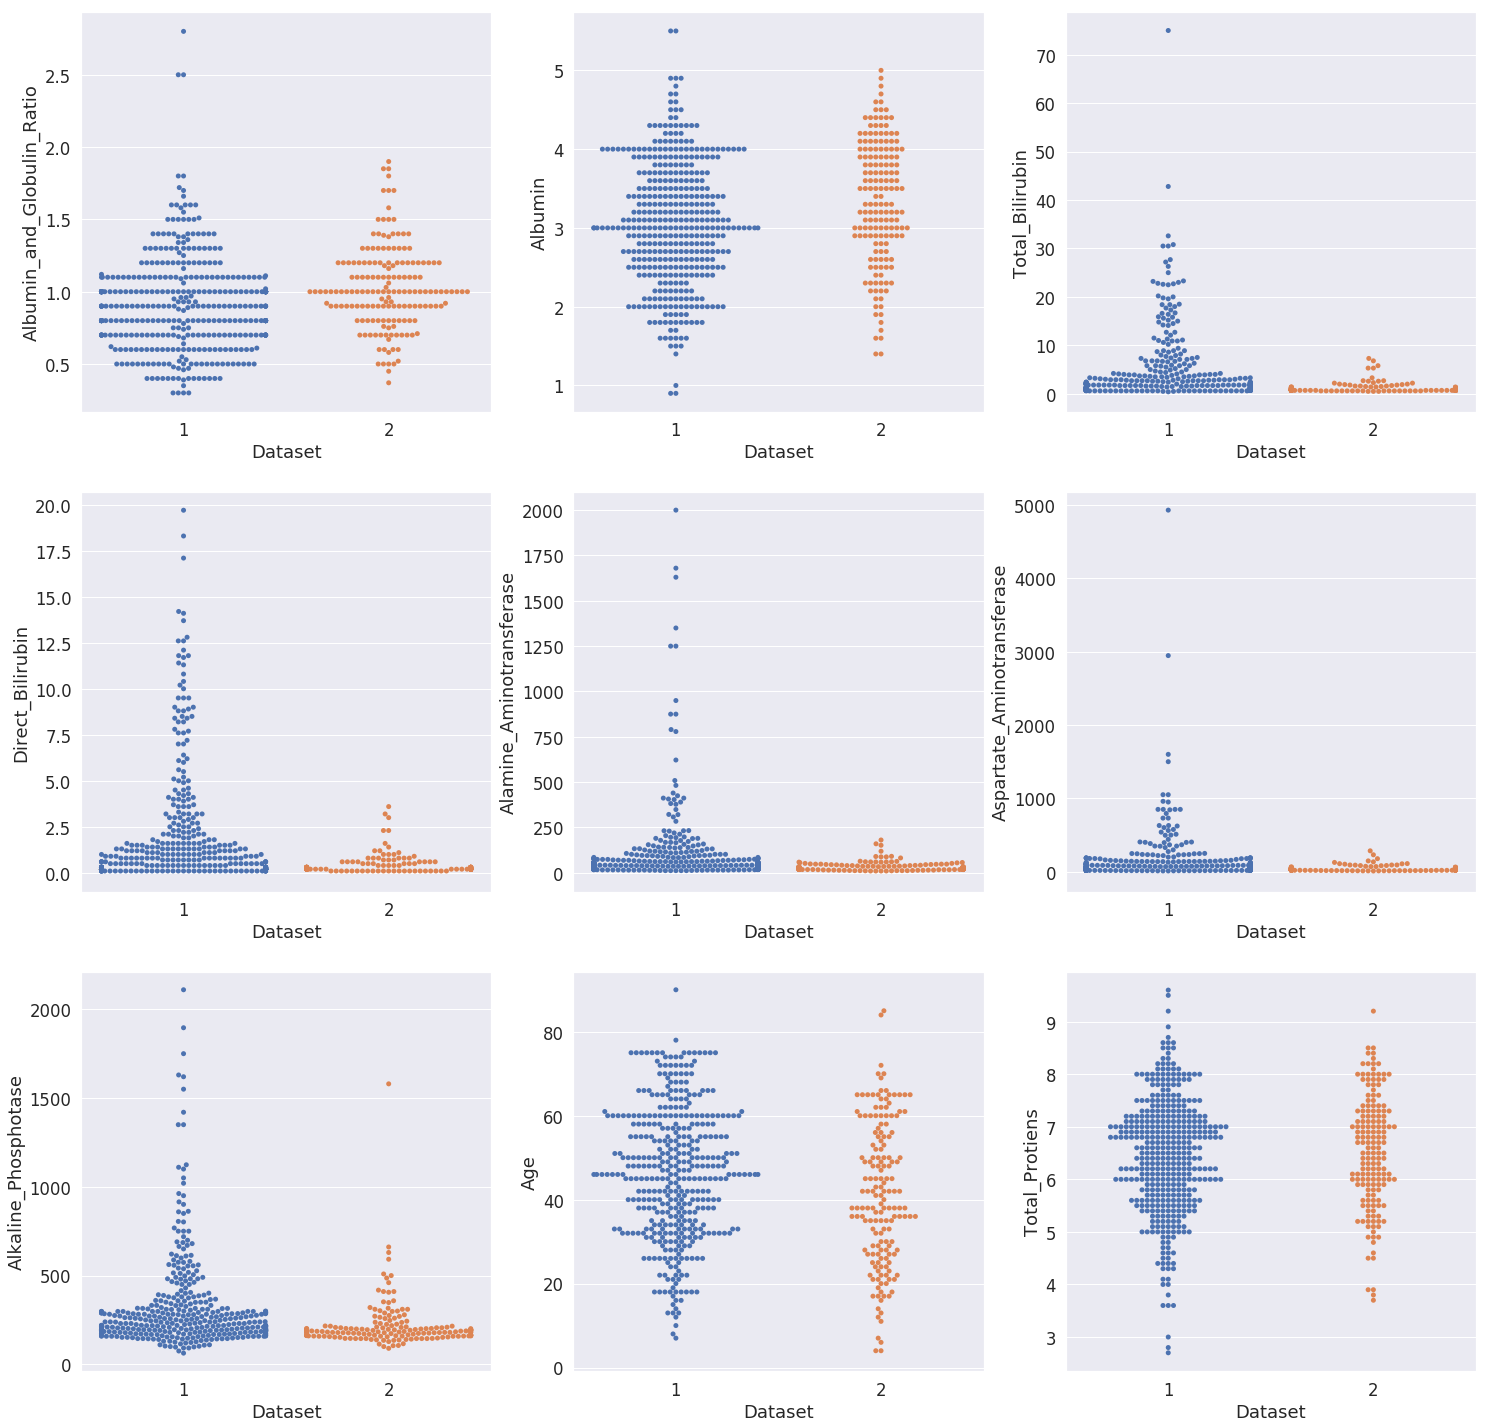

In [13]:
plot_data(cols, data, 'swarm')

### Swarm plots show outliers for some of the features for both healthy and unhealthy patients. However, we can not claim that these outliers represent erroneous data points.  

sns.boxplot(x='Dataset',y='Albumin_and_Globulin_Ratio',data=data)
sns.boxplot(x='Dataset',y='Albumin',data=data)
sns.boxplot(x='Dataset',y='Total_Bilirubin',data=data)
sns.boxplot(x='Dataset',y='Direct_Bilirubin',data=data)
sns.boxplot(x='Dataset',y='Alamine_Aminotransferase',data=data)
sns.boxplot(x='Dataset',y='Aspartate_Aminotransferase',data=data)
sns.boxplot(x='Dataset',y='Alkaline_Phosphotase',data=data)
sns.boxplot(x='Dataset',y='Age',data=data)
sns.boxplot(x='Dataset',y='Total_Protiens',data=data)


0

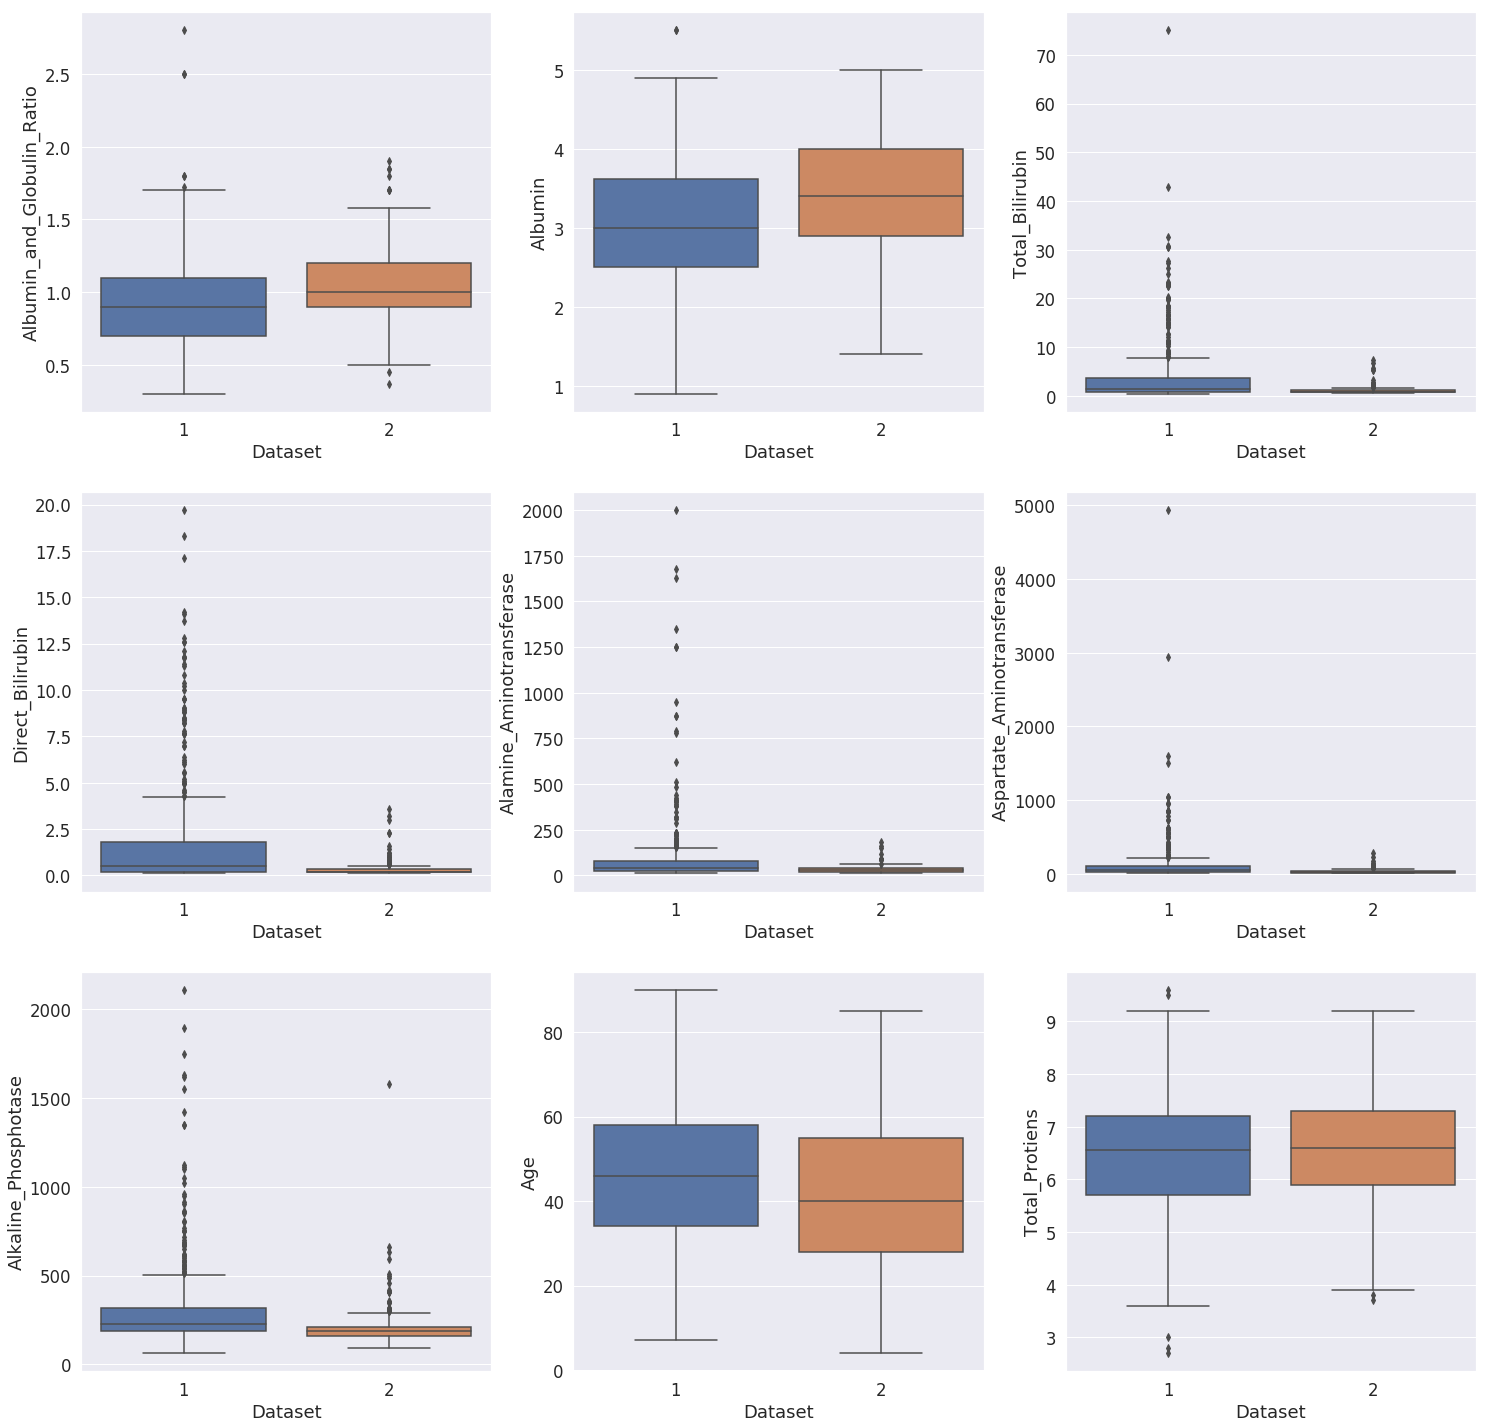

In [14]:
plot_data(cols, data, 'box')

### From the above barplots, we can count outliers of some features for healthy patients to be within the quantile  ranges of unhealthy patients. For example, Aspartate Aminotransfertase max value for healthy patients is within whisker extent of the corresponding unhealthy patients. 

In [15]:
# Calculate correlation between features
num_cols = data._get_numeric_data().columns
cor = data[num_cols].corr()

threshold = 0.7

corlist = []

for i in range(0,len(num_cols)):
    for j in range(i+1,len(num_cols)):
        if (j != i and cor.iloc[i,j] <= 1 ) or (j != i and cor.iloc[i,j] >= -1):
            corlist.append([cor.iloc[i,j],i,j]) 

#Sort higher correlations first            
sort_corlist = sorted(corlist,key=lambda x: -abs(x[0]))

### After finding correlation between features, we will filter them with threshold value above or equal to 0.6 in order to identify stronger correlated ones.

In [16]:
x_m_plot=[]
y_m_plot=[]
for x,i,j in sort_corlist:
    if num_cols[i] != 'Dataset' and num_cols[j] != 'Dataset':
        if x >= 0.60:
            x_m_plot.append(num_cols[i])
            y_m_plot.append(num_cols[j])
            print (num_cols[i],num_cols[j],x)

Total_Bilirubin Direct_Bilirubin 0.8746179301164149
Alamine_Aminotransferase Aspartate_Aminotransferase 0.7919656848536135
Total_Protiens Albumin 0.7840533353871901
Albumin Albumin_and_Globulin_Ratio 0.6860914626301073


### Scatter Plots <a class="anchor" id="sixth-bullet"></a>

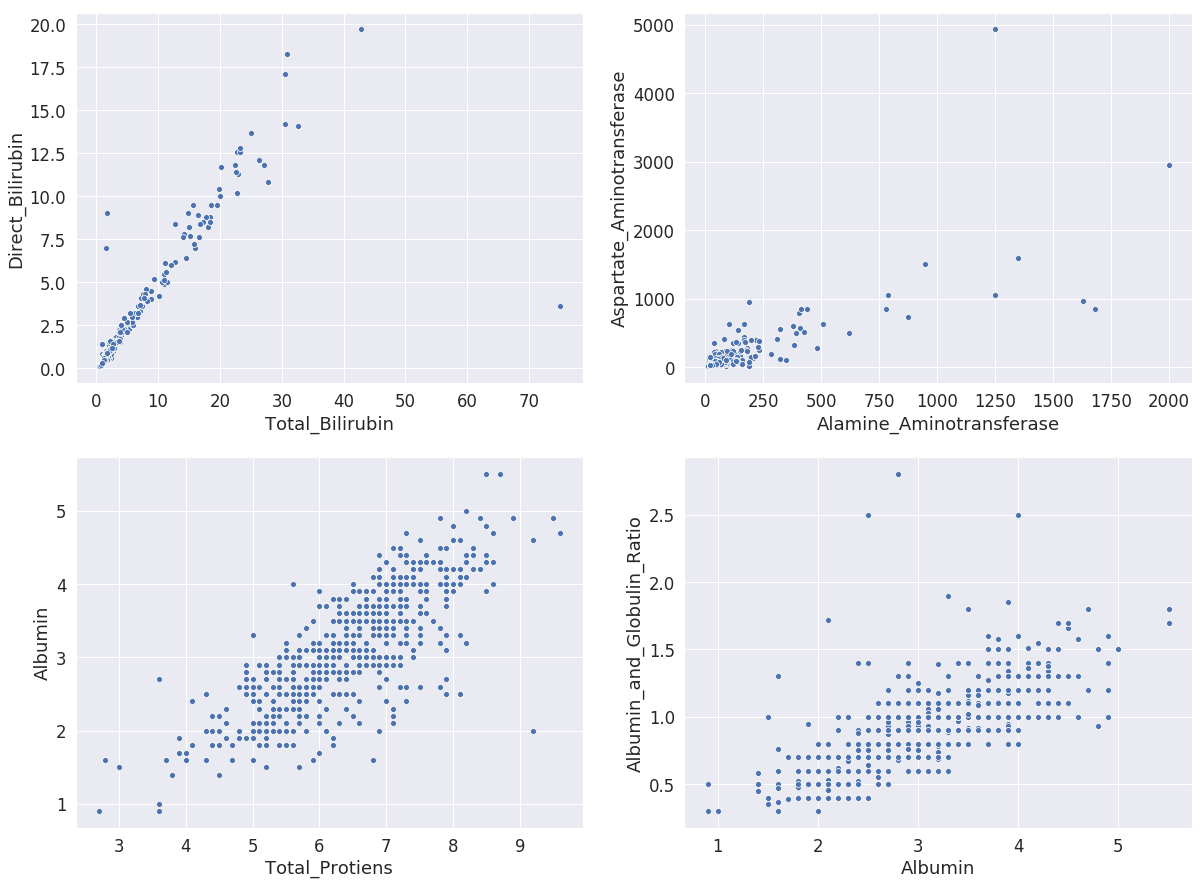

In [17]:
# Plot stronger correlated features.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes=axes.flatten()
for i in range(len(x_m_plot)):
    sns.scatterplot(data=data, x=x_m_plot[i], y=y_m_plot[i], ax=axes[i])

### Features significance <a class="anchor" id="seventh-bullet"></a>

Text(0.5, 1.0, 'Feature Significance')

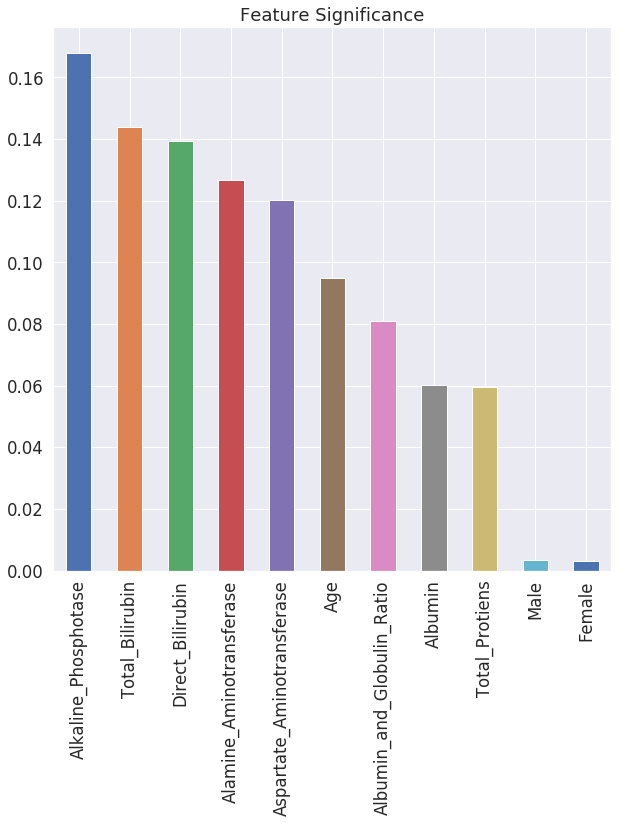

In [18]:
X = data.drop(['Dataset'], axis=1)
y = data.Dataset

cols = data.columns
cols = list(set(cols))
del cols[cols.index('Dataset')]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X[cols], y, test_size = 0.3, random_state=42, stratify=y)

# Select random forest classifier
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}

scoring = make_scorer(accuracy_score, greater_is_better=True)

# Train and the RF classifier
cl_rand_fr = GridSearchCV(rfc, param_grid=parameters, scoring=scoring)
cl_rand_fr.fit(X_train, y_train)
cl_rand_fr = cl_rand_fr.best_estimator_

coef = pd.Series(cl_rand_fr.feature_importances_, index = X_train.columns).sort_values(ascending=False)

# Plot feauture importance 
plt.figure(figsize=(10, 10))
coef.head(11).plot(kind='bar')
plt.title('Feature Significance')

## Answers to Questions <a class="anchor" id="fourth-bullet"></a>


## Steps:

1. Ask the following questions and look for the answers using code and plots:

    Can you count something interesting?
    #### *There are missing values for the Albumin_and_Globulin_Ratio feature. Also, we observe one categorical variable "Gender".*
    
    #### *Data is imbalanced becuase there are more records for patients with liver disease compared to healthy patients.*
    Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
    
    #### *On histogram plots we observe that the healthy patients have higher frequency of small values in narrow ranges comapred to unhealthy patients.* 
    
    #### *On barplots, we find outliers of some features for healthy patients to be within the quantile  ranges of unhealthy patients. For example, Aspartate Aminotransfertase max value for healthy patients is within whisker extent of the corresponding unhealthy patients.* 
    
    Can you make a bar plot or a histogram?
    
    #### *Plots are included in [Exploratory Data Analyses (EDA)](#third-bullet) section.*
    
    Can you compare two related quantities?
    
    ##### *After finding correlation coefficients between features, we filter them with threshold value above or equal to 0.6 in order to identify stronger correlated ones:*
    
    *Total_Bilirubin Direct_Bilirubin 0.8746179301164149* <br>
    *Alamine_Aminotransferase Aspartate_Aminotransferase 0.7919656848536135* <br>
    *Total_Protiens Albumin 0.7840533353871901* <br>
    *Albumin Albumin_and_Globulin_Ratio 0.6860914626301073* <br>
    
    Can you make a scatterplot?
    
    #### *Scatter plots are included in [Scatter Plots](#sixth-bullet) subsection.*
    
    Can you make a time-series plot?
    
    #### *Time-series plot is not applicable to the current data set.*
    

2. Looking at the plots: 
    
    What are some insights you can make? 
    
    #### *Swarm plots show outliers for some of the features for both healthy and unhealthy patients. However, we can not claim that these outliers represent erroneous data points.*
    
    Do you see any correlations? 
    
    #### *The [Scatter Plots](#sixth-bullet) show these correlations.*
    
    Is there a hypothesis you’d like to investigate further?
    
    #### *There are not that many features and samples in the dataset to perform the hypothesis testing*
   
    What other questions do the insights lead you to ask?
    
    #### *Which features are more significant for the predictive model?*


3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. 
    
    Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story?
    
    What are some other trends/relationships you think will make the story more complete?
    
    #### *One of the asked questions was the feature significance, which was found using the random forest classifier: [Feature significance](#seventh-bullet).*
   
    